In [1]:
#using Revise
addprocs(4)
using CMDPs
using POMDPs, POMDPToolbox, POMDPModels, MCTS
using DataFrames
using Plots; gr()

Plots.GRBackend()

In [2]:
mdp = InvertedPendulum()
b = DPWBandit(mdp)
solver = ModularSolver(mdp, b, n_iterations=5)
policy = solve(solver, mdp);

In [3]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)

(-0.00609348415883817, 0.023240135119208485)

In [4]:
hr = HistoryRecorder(; max_steps=40, rng=Base.GLOBAL_RNG)
h = simulate(hr, mdp, policy, s0);

In [5]:
h.state_hist

11-element Array{Tuple{Float64,Float64},1}:
 (-0.00609348, 0.0232401)
 (-0.0392541, -0.686452) 
 (-0.114001, -0.80849)   
 (-0.207332, -1.05814)   
 (-0.29072, -0.609605)   
 (-0.405277, -1.68154)   
 (-0.563379, -1.4805)    
 (-0.74658, -2.18351)    
 (-0.990407, -2.69303)   
 (-1.3403, -4.30487)     
 (-1.84711, -5.83122)    

In [6]:
h.reward_hist

10-element Array{Float64,1}:
  0.1
  0.1
  0.1
  0.1
  0.1
  0.1
  0.1
  0.1
  0.1
 -1.0

In [7]:
## Study

In [14]:
study = RewardvsN(; mdp=InvertedPendulum(), n_seeds=50, n_iters=[5, 10, 20, 30, 40, 50], max_steps=50)

CMDPs.RewardvsN
  mdp: POMDPModels.InvertedPendulum
  bandits: Array{DataType}((1,))
  n_seeds: Int64 50
  n_iters: Array{Int64}((6,)) [5, 10, 20, 30, 40, 50]
  max_steps: Int64 50


In [15]:
result = run_study(study)

CMDPs.RewardvsNResult("Inverted Pendulum", 300×4 DataFrames.DataFrame
│ Row │ alg            │ seed │ n_iters │ r_total │
├─────┼────────────────┼──────┼─────────┼─────────┤
│ 1   │ MCTS.DPWBandit │ 1    │ 5       │ 0.3     │
│ 2   │ MCTS.DPWBandit │ 2    │ 5       │ 5.0     │
│ 3   │ MCTS.DPWBandit │ 3    │ 5       │ 3.7     │
│ 4   │ MCTS.DPWBandit │ 4    │ 5       │ 1.6     │
│ 5   │ MCTS.DPWBandit │ 5    │ 5       │ 5.0     │
│ 6   │ MCTS.DPWBandit │ 6    │ 5       │ 1.9     │
│ 7   │ MCTS.DPWBandit │ 7    │ 5       │ -0.2    │
│ 8   │ MCTS.DPWBandit │ 8    │ 5       │ 5.0     │
│ 9   │ MCTS.DPWBandit │ 9    │ 5       │ 5.0     │
│ 10  │ MCTS.DPWBandit │ 10   │ 5       │ 1.3     │
│ 11  │ MCTS.DPWBandit │ 11   │ 5       │ 1.7     │
⋮
│ 289 │ MCTS.DPWBandit │ 39   │ 50      │ 5.0     │
│ 290 │ MCTS.DPWBandit │ 40   │ 50      │ 5.0     │
│ 291 │ MCTS.DPWBandit │ 41   │ 50      │ 5.0     │
│ 292 │ MCTS.DPWBandit │ 42   │ 50      │ 5.0     │
│ 293 │ MCTS.DPWBandit │ 43   │ 50      │ 5.

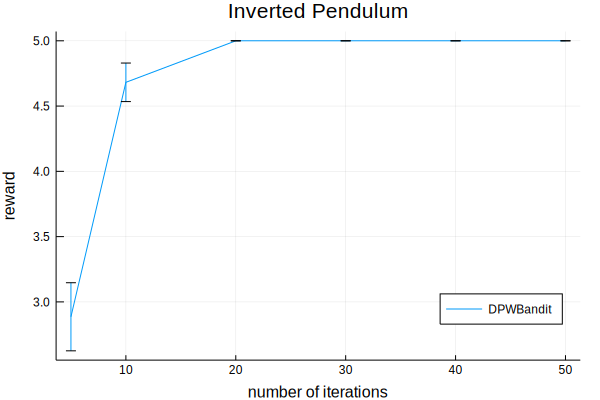

In [16]:
Plots.plot(result)